In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

In [2]:
predict = pd.read_csv('predict/data_v3/oie_def/predict_result.tsv', sep='\t', header=None, names=['kb_desc', 'oie_rel', 'dist', 'label'], quoting=csv.QUOTE_NONE)
predict_ent = pd.read_csv('predict/data_v3/oie_def_ent_root/predict_result.tsv', sep='\t', header=None, names=['kb_desc', 'oie_rel', 'dist', 'label'], quoting=csv.QUOTE_NONE)
predict_base = pd.read_csv('predict/data_v3/oie_no_def/predict_result.tsv', sep='\t', header=None, names=['kb_desc', 'oie_rel', 'dist', 'label'], quoting=csv.QUOTE_NONE)
predict_pcnn_ent = pd.read_csv('predict/data_v3/pcnn_oie_def_ent_root/predict_result.tsv', sep='\t', header=None, names=['kb_desc', 'oie_rel', 'dist', 'label'], quoting=csv.QUOTE_NONE)
predict_pcnn_gph = pd.read_csv('predict/data_graphene/pcnn_oie_def_ent_root/predict_result.tsv', sep='\t', header=None, names=['kb_desc', 'oie_rel', 'dist', 'label'], quoting=csv.QUOTE_NONE)

In [3]:
# Calculate model performance
label = np.array(predict['label'], dtype=int)
label_scores = np.array(predict['dist'])
precision, recall, thresholds = precision_recall_curve(label, label_scores)

label_ent = np.array(predict_ent['label'], dtype=int)
label_scores_ent = np.array(predict_ent['dist'])
precision_ent, recall_ent, thresholds_ent = precision_recall_curve(label_ent, label_scores_ent)

label_pcnn_ent = np.array(predict_pcnn_ent['label'], dtype=int)
label_scores_pcnn_ent = np.array(predict_pcnn_ent['dist'])
precision_pcnn_ent, recall_pcnn_ent, thresholds_pcnn_ent = precision_recall_curve(label_pcnn_ent, label_scores_pcnn_ent)

label_pcnn_gph = np.array(predict_pcnn_gph['label'], dtype=int)
label_scores_pcnn_gph = np.array(predict_pcnn_gph['dist'])
precision_pcnn_gph, recall_pcnn_gph, thresholds_pcnn_gph = precision_recall_curve(label_pcnn_gph, label_scores_pcnn_gph)

# Calculate baseline performance
label_base = np.array(predict_base['label'], dtype=int)
label_scores_base = np.array(predict_base['dist'])
precision_base, recall_base, thresholds_base = precision_recall_curve(label_base, label_scores_base)

In [4]:
len(precision), len(precision_ent)

(12387, 42827)

<Figure size 432x288 with 0 Axes>

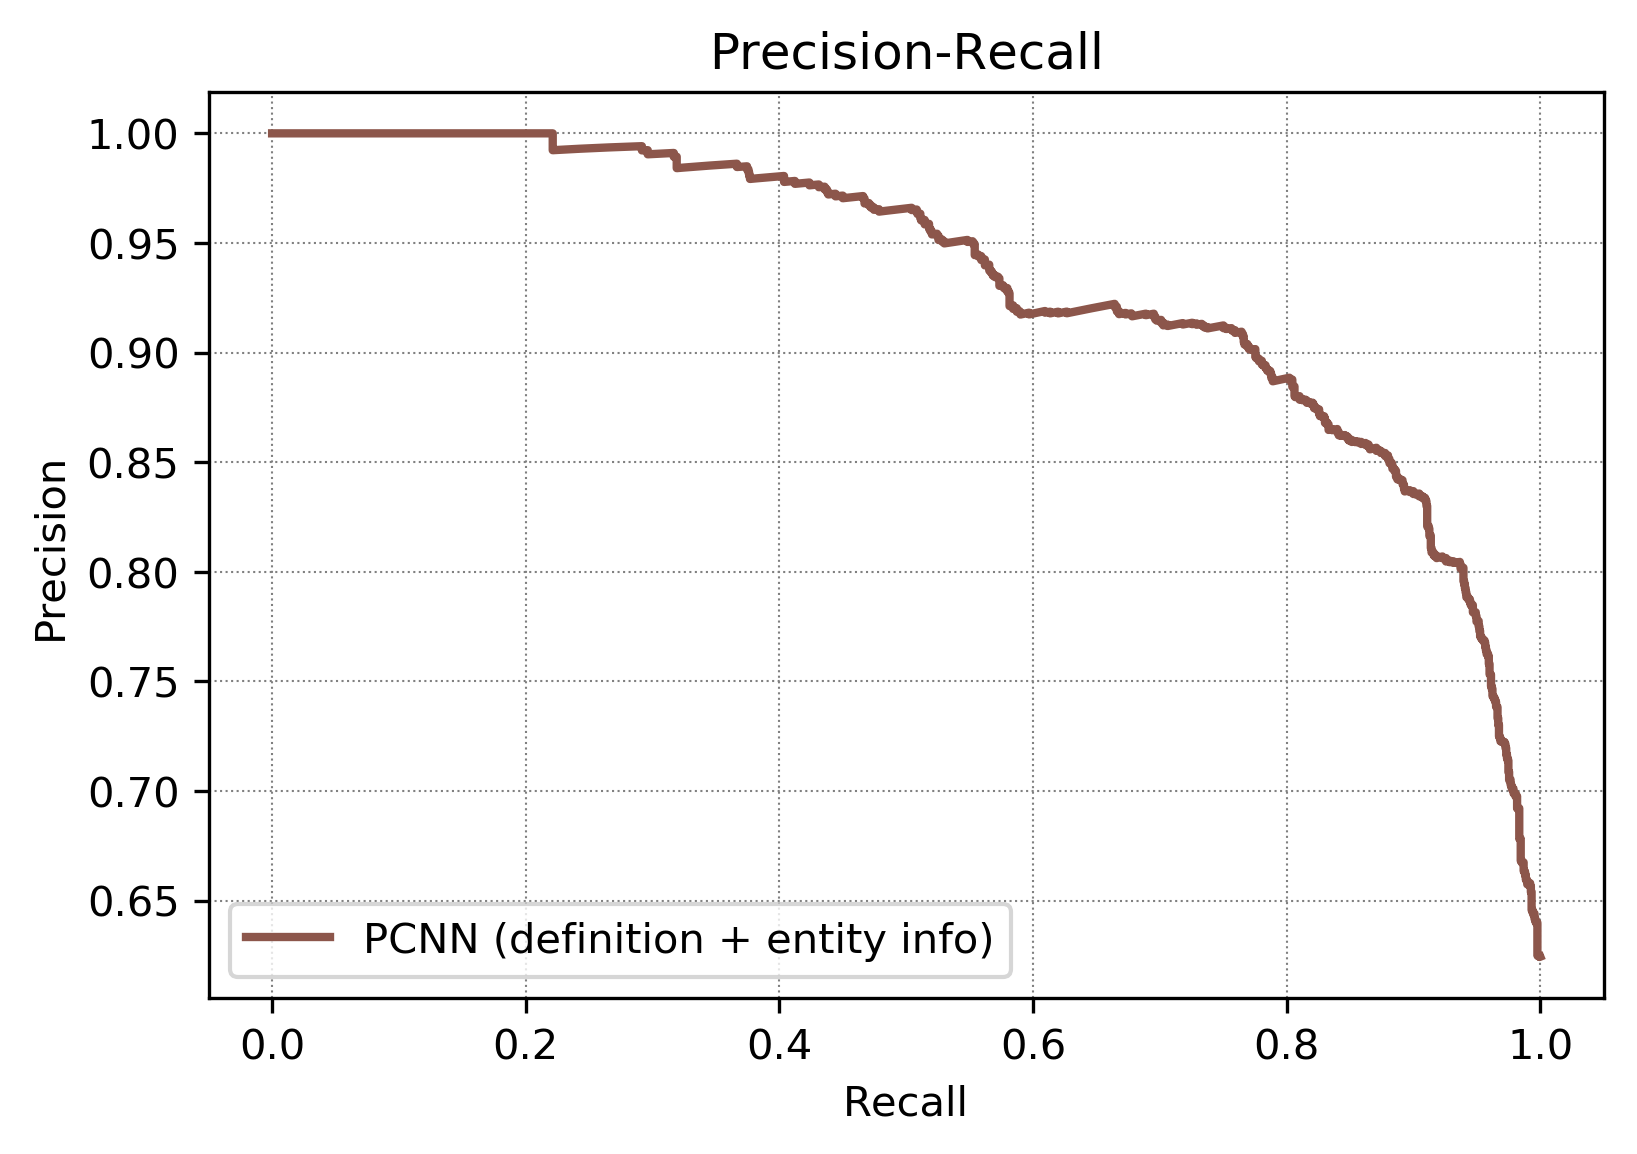

In [14]:
# Plot Precision-Recall curve
plt.clf()
plt.figure(dpi=300)
# plt.plot(recall_base, precision_base, lw=2, color='C1', ls='-', label='CNN (no definition)')
# plt.plot(recall, precision, lw=2, color='C2', ls='-', label='CNN (definition)')
# plt.plot(recall_ent, precision_ent, lw=2, color='C3', ls='-', label='CNN (definition + entity info)')
# plt.plot(recall_pcnn_ent, precision_pcnn_ent, lw=2, color='C4', ls='-', label='PCNN (definition + entity info)')
plt.plot(recall_pcnn_gph, precision_pcnn_gph, lw=2, color='C5', ls='-', label='PCNN (definition + entity info)')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall')
plt.grid(color='grey', lw=0.5, linestyle='dotted')
plt.legend(loc='lower left')
plt.show()

In [6]:
average_precision_score(label, label_scores), average_precision_score(label_ent, label_scores_ent), average_precision_score(label_pcnn_ent, label_scores_pcnn_ent), average_precision_score(label_base, label_scores_base)

(0.7457743087158994,
 0.8377781861791077,
 0.9138377517686493,
 0.7516986785522041)

In [7]:
average_precision_score(label_pcnn_ent, label_scores_pcnn_ent), average_precision_score(label_pcnn_gph, label_scores_pcnn_gph)

(0.9138377517686493, 0.9338931826177844)

In [10]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    """
    Modified from:
    Hands-On Machine learning with Scikit-Learn
    and TensorFlow; p.89
    """
    plt.figure(dpi=300)
    plt.grid(True, linestyle=':')
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')

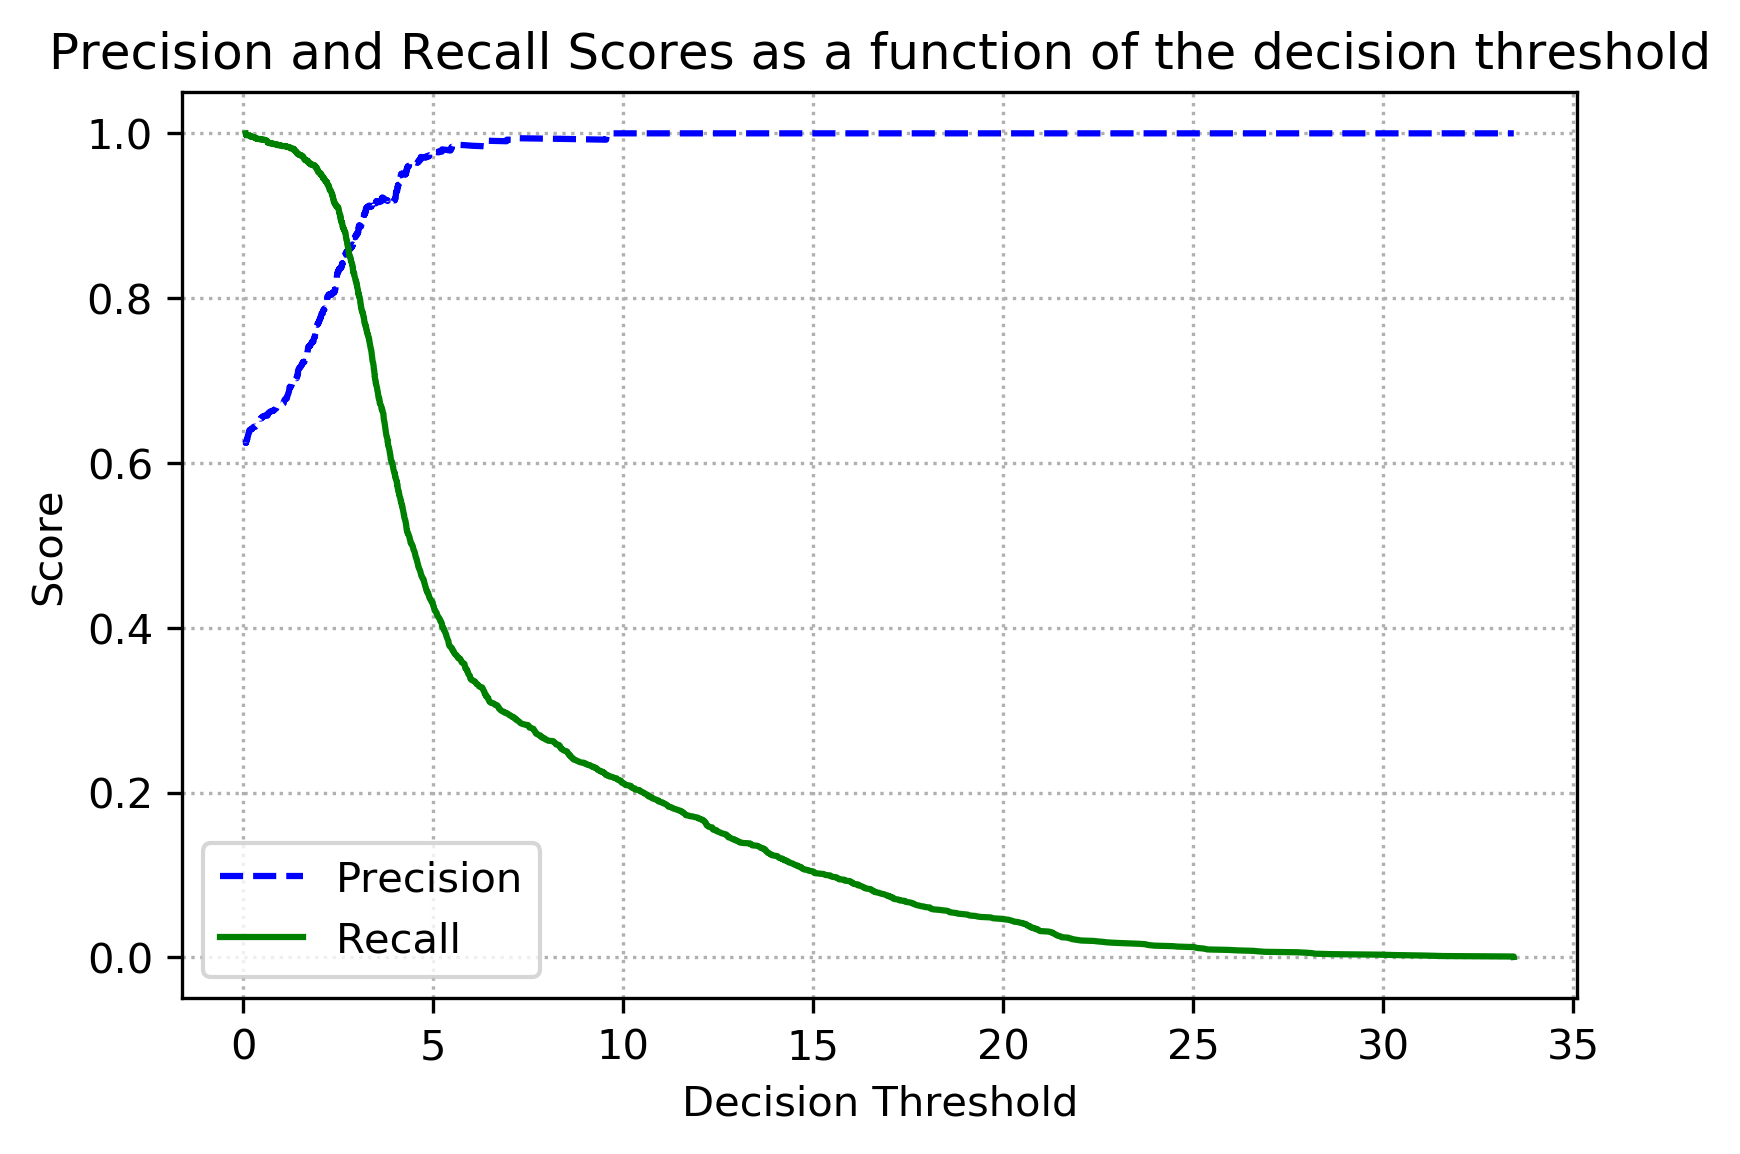

In [11]:
plot_precision_recall_vs_threshold(precision_pcnn_gph, recall_pcnn_gph, thresholds_pcnn_gph)

### Reformat Aligment Result

In [22]:
data_header = ['e1_kb', 'rel_kb', 'rel_id', 'e2_kb', 'e1_oie', 'rel_oie', 'e2_oie',
               'e1_kb_id', 'e2_kb_id', 'e1_oie_id', 'e2_oie_id',
               'e1_oie_root', 'e2_oie_root', 'label']
test_align = pd.read_csv('dataset/graphene/graphene_triple_sample_input.tsv', sep='\t', header=None, names=data_header)

In [23]:
test_align

,e1_kb,rel_kb,rel_id,e2_kb,e1_oie,rel_oie,e2_oie,e1_kb_id,e2_kb_id,e1_oie_id,e2_oie_id,e1_oie_root,e2_oie_root,label
0,Caruso,instance of,P31,Rosa Ponselle,Enrico Caruso,is,Rosa Ponselle,Q2564506,Q260264,Q2564506,Q260264,Caruso,Rosa Ponselle,1
1,Caruso,country,P17,Rosa Ponselle,Enrico Caruso,is,Rosa Ponselle,Q2564506,Q260264,Q2564506,Q260264,Caruso,Rosa Ponselle,1
2,Caruso,country of citizenship,P27,Rosa Ponselle,Enrico Caruso,is,Rosa Ponselle,Q2564506,Q260264,Q2564506,Q260264,Caruso,Rosa Ponselle,1
3,Caruso,occupation,P106,Rosa Ponselle,Enrico Caruso,is,Rosa Ponselle,Q2564506,Q260264,Q2564506,Q260264,Caruso,Rosa Ponselle,1
4,Caruso,located in the administrative territorial entity,P131,Rosa Ponselle,Enrico Caruso,is,Rosa Ponselle,Q2564506,Q260264,Q2564506,Q260264,Caruso,Rosa Ponselle,1
5,Caruso,place of birth,P19,Rosa Ponselle,Enrico Caruso,is,Rosa Ponselle,Q2564506,Q260264,Q2564506,Q260264,Caruso,Rosa Ponselle,1
6,Caruso,shares border with,P47,Rosa Ponselle,Enrico Caruso,is,Rosa Ponselle,Q2564506,Q260264,Q2564506,Q260264,Caruso,Rosa Ponselle,1
7,Caruso,member of sports team,P54,Rosa Ponselle,Enrico Caruso,is,Rosa Ponselle,Q2564506,Q260264,Q2564506,Q260264,Caruso,Rosa Ponselle,1
8,Caruso,cast member,P161,Rosa Ponselle,Enrico Caruso,is,Rosa Ponselle,Q2564506,Q260264,Q2564506,Q260264,Caruso,Rosa Ponselle,1
9,Caruso,taxon rank,P105,Rosa Ponselle,Enrico Caruso,is,Rosa Ponselle,Q2564506,Q260264,Q2564506,Q260264,Caruso,Rosa Ponselle,1


In [29]:
predict_pcnn_gph = pd.read_csv('predict_triviaqa/predict_result.tsv', sep='\t', header=None, names=['kb_desc', 'oie_rel', 'dist', 'label'], quoting=csv.QUOTE_NONE)

In [31]:
predict_pcnn_gph

,kb_desc,oie_rel,dist,label
0,Caruso that class of which this subject is a p...,"Caruso have an existence, be extant Rosa Ponselle",2.463253,1.0
1,Caruso sovereign state of this item; don't use...,"Caruso have an existence, be extant Rosa Ponselle",3.284198,1.0
2,Caruso the object is a country that recognizes...,"Caruso have an existence, be extant Rosa Ponselle",3.864547,1.0
3,"Caruso occupation of a person; see also ""field...","Caruso have an existence, be extant Rosa Ponselle",2.791381,1.0
4,Caruso the item is located on the territory of...,"Caruso have an existence, be extant Rosa Ponselle",3.044863,1.0
5,Caruso most specific known (e.g. city instead ...,"Caruso have an existence, be extant Rosa Ponselle",2.772680,1.0
6,Caruso countries or administrative subdivision...,"Caruso have an existence, be extant Rosa Ponselle",3.065900,1.0
7,Caruso sports teams or clubs that the subject ...,"Caruso have an existence, be extant Rosa Ponselle",5.194952,1.0
8,Caruso actor performing live for a camera or a...,"Caruso have an existence, be extant Rosa Ponselle",3.121164,1.0
9,Caruso level in a taxonomic hierarchy Rosa Pon...,"Caruso have an existence, be extant Rosa Ponselle",2.993821,1.0


In [32]:
threshold = 2.6
with open('predict_triviaqa/graphene_triple_sample_result.tsv', 'w') as f:
    f.write('e1 oie\trel oie\te2 oie\te1 oie root\te2 oie root\te1 kb id\te2 kb id\trel kb id\trel kb\tdist\n')
    for i in range(len(test_align)):
        if predict_pcnn_gph['dist'][i] < threshold:
            f.write(test_align['e1_oie'][i] + '\t' + test_align['rel_oie'][i] + '\t' + test_align['e2_oie'][i] + '\t')
            f.write(str(test_align['e1_oie_root'][i]) + '\t' + str(test_align['e2_oie_root'][i]) + '\t')
            f.write(str(test_align['e1_oie_id'][i]) + '\t' + str(test_align['e2_oie_id'][i]) + '\t')
            f.write(test_align['rel_id'][i] + '\t' + test_align['rel_kb'][i] + '\t' + str(predict_pcnn_gph['dist'][i]))
            f.write('\n')
f.closed

True

### Visualize Embedding

In [32]:
rel_vector = pd.read_csv('predict/data_v3/pcnn_oie_def_ent_root/rel_embed_vector.tsv', sep='\t', header=None, names=['el1', 'el2'])
data_header = ['e1_kb', 'rel_kb', 'rel_id', 'e2_kb', 'e1_oie', 'rel_oie', 'e2_oie',
               'e1_kb_id', 'e2_kb_id', 'e1_oie_id', 'e2_oie_id',
               'e1_oie_root', 'e2_oie_root', 'label']
test_align = pd.read_csv('dataset/test_align_filtered_balanced.tsv', sep='\t', header=None, names=data_header)
rel_label = test_align['rel_oie']
rel_label_unique = pd.read_csv('predict/data_v3/pcnn_oie_def_ent_root/rel_embed_label.tsv', sep='\t', header=None, names=['label'])
rel_label_unique = rel_label_unique.drop_duplicates()

In [33]:
rel_label[0]

'are'

In [34]:
vector_x = []
vector_y = []
for index, row in rel_label_unique.iterrows():
    vector_x.append(rel_vector['el1'][index])
    vector_y.append(rel_vector['el2'][index])

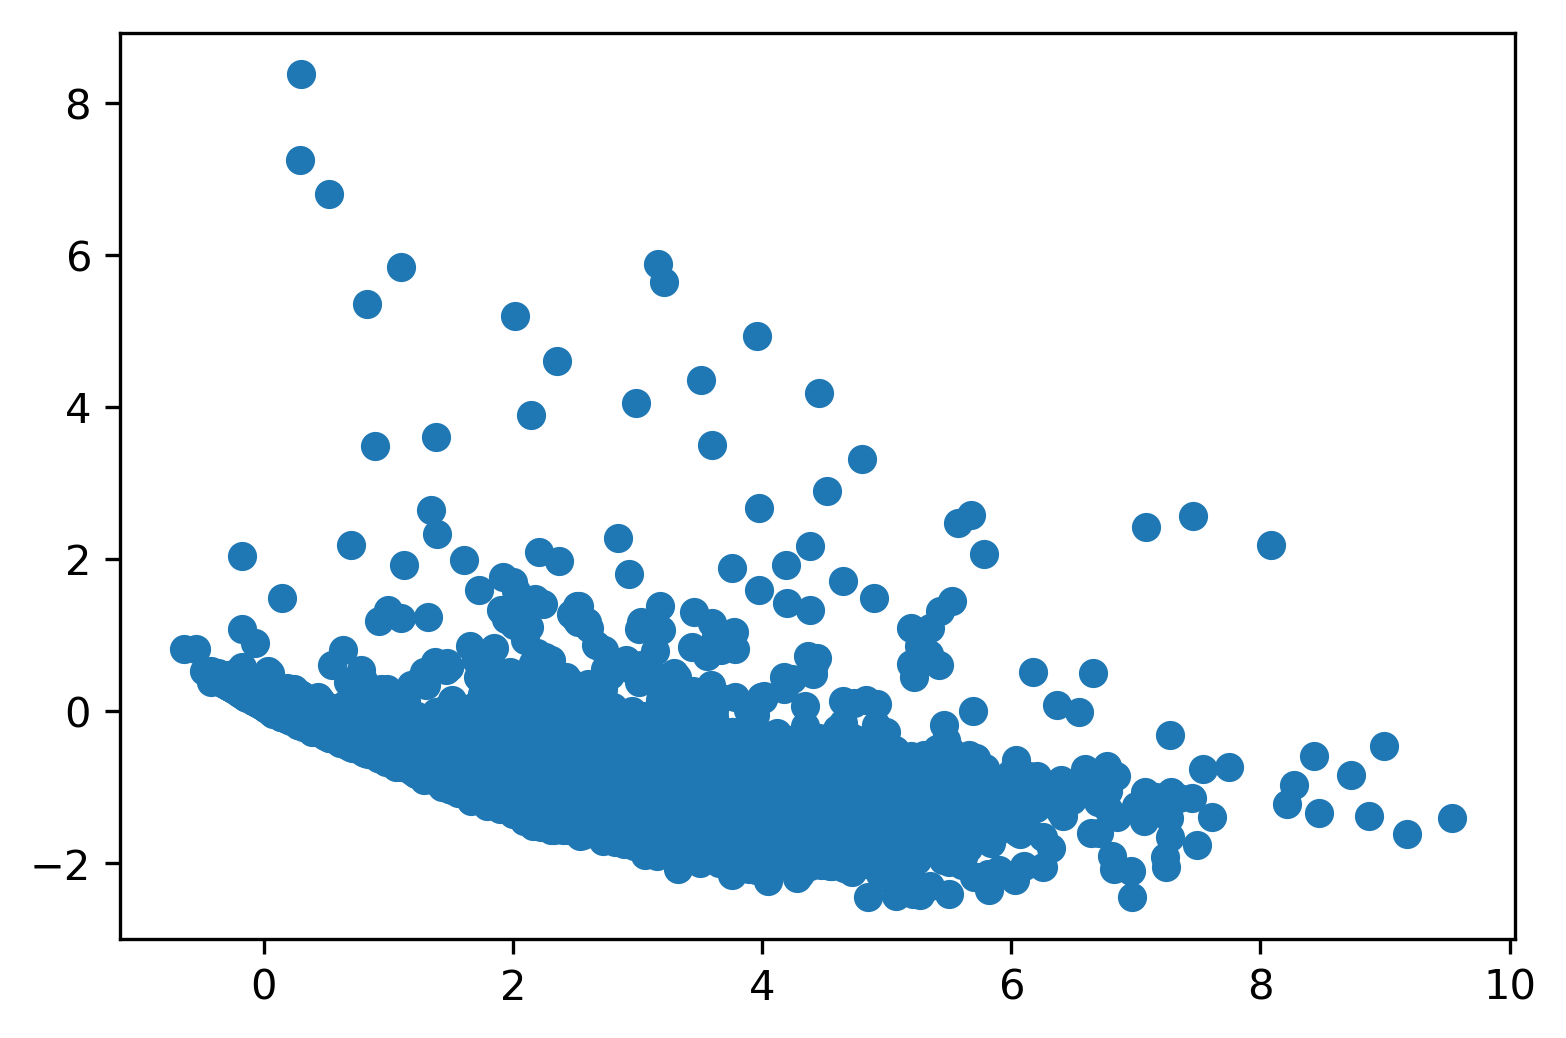

In [35]:
fig, ax = plt.subplots(dpi=300)
# plt.ylim((-1.75, 2.25))
# plt.xlim((-2.25, 1.75))
ax.scatter(vector_x, vector_y)

In [40]:
vector_x = []
vector_y = []
label = []
observed_label = ['was daughter of', 'was son of',
                  #'are languages of', 'are official languages of', 'is spoken in',
                  #'is nation in', 'is state in', 'is country in'
                 ]
for index, row in rel_label_unique.iterrows():
    label_txt = rel_label[index]
    if label_txt in observed_label:
        label.append(label_txt)
        vector_x.append(rel_vector['el1'][index])
        vector_y.append(rel_vector['el2'][index])

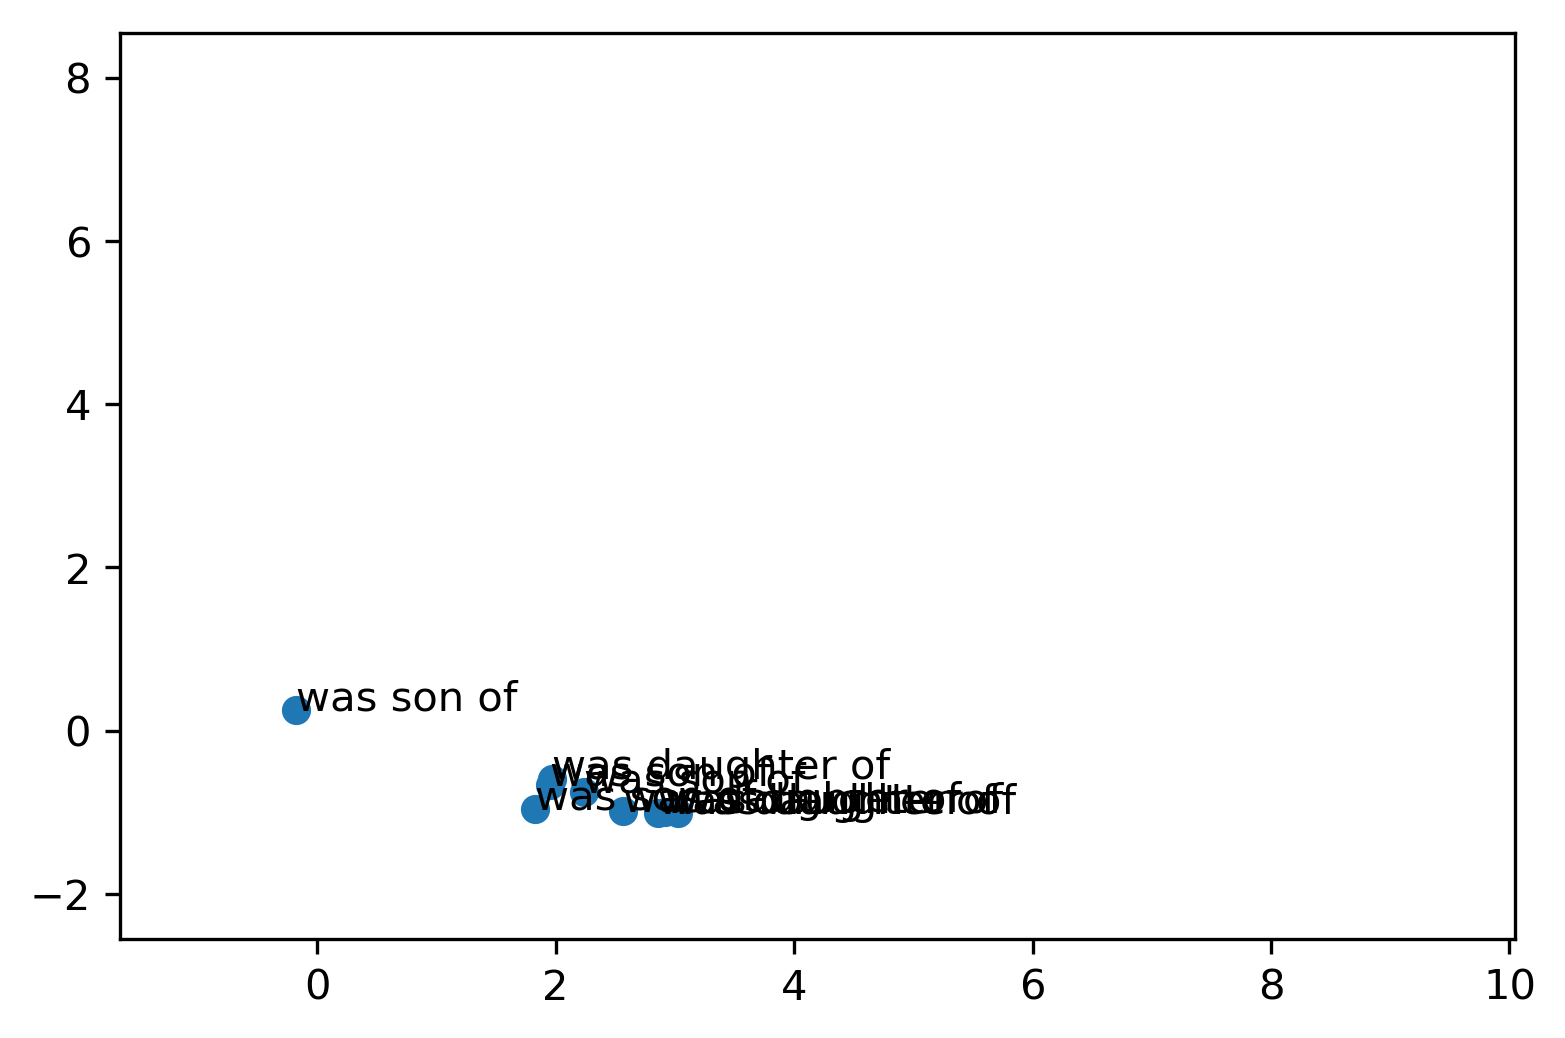

In [41]:
fig, ax = plt.subplots(dpi=300)
ax.scatter(vector_x, vector_y)
plt.ylim((-2.55, 8.55))
plt.xlim((-1.65, 10.05))

for i, txt in enumerate(label):
    ax.annotate(txt, (vector_x[i], vector_y[i]))

### Relation Coverage

In [32]:
rel_predict = pd.read_csv('predict/oie_def_ent_root/predict_result_sort.tsv', sep='\t', header=None, names=['rel_kb', 'rel_oie', 'label'])
rel_predict_0 = rel_predict[rel_predict.label != 1]
rel_predict_1 = rel_predict[rel_predict.label != 0]
rel_oie_0 = set(rel_predict_0['rel_oie'])
rel_oie_1 = set(rel_predict_1['rel_oie'])

In [33]:
rel_oie_0

{"'s Meckler is",
 "'s business is",
 "'s capital is",
 "'s city is",
 "'s father is",
 "'s parents is",
 "'s settlement is",
 "'s son is",
 'Additionally has system in',
 'Bevillard in',
 'Compared to',
 'Council of',
 'Due to',
 'Economically is city in',
 'Economically is most prosperous city in',
 'Economically is prosperous city in',
 'Formerly owned by',
 'Further developments of were',
 'Governor of',
 'However is corrupt country in',
 'However is country in',
 'However is most corrupt country in',
 'However is still corrupt country in',
 'However is still country in',
 'However is still most corrupt country in',
 'King of',
 'Located in',
 'Monarchy of',
 "Museum 's",
 'Originating in',
 'Phantom of',
 'Republic of',
 'University of',
 'accompanies',
 'acquire',
 'administrative center in',
 'adopted',
 'advocated',
 'advocated as late',
 'advocated late',
 'airport in',
 'allowing',
 'also appeared as',
 'also called',
 'also gave',
 'also run education courses in',
 'appeared

In [34]:
uncovered_rel = set([x for x in rel_oie_1 if x not in rel_oie_0])

In [35]:
uncovered_rel

{'Additionally is heartland of',
 'Eventually discovered',
 'Following',
 'Founded as',
 'General of',
 'Helen of',
 'However was moved to',
 'Later was released as',
 'Owing to',
 'Portuguese for',
 'Trained in',
 'acquired',
 'acquired position in',
 'addition to',
 'administered by',
 'after',
 'agreed',
 'along were ceded',
 'along were ceded to',
 'also hosts',
 'also ran agency from',
 'also ran from',
 'also restored',
 'apprentice alongside',
 'are Among',
 'are collection by',
 'are flat lengths of',
 'are from',
 'are languages of',
 'are latest of',
 'are lengths of',
 'are official languages of',
 'are popular uses of',
 'are uses of',
 'arguably stood as',
 'at',
 'at Challenge is',
 'attended',
 'be home to',
 'be released as',
 'be understood as',
 'becomes',
 'becoming',
 'been',
 'began',
 'began Following',
 'being',
 'being constructed near',
 'bore son to',
 'born to',
 'bought majority through',
 'built',
 'came',
 'came in',
 'center for',
 'changed name to',
 'ch

In [37]:
len(uncovered_rel), len(set(rel_predict['rel_oie']))

(408, 1030)

In [38]:
with open('predict/oie_def/uncovered_oie_rel.txt', 'w') as f:
    for item in uncovered_rel:
        f.write("%s\n" % item)